# Convert images to jpg & create a Thumbnail

# Settings

In [15]:
# The image to convert
# IMAGE_DIR = "../images/IConfucius"
# IMAGE_NAME = "IConfucius"
# IMAGE_EXT = "jpg"

# IMAGE_DIR = "../images/IConfucius-agent"
# IMAGE_NAME = "IConfucius-agent"
# IMAGE_EXT = "webp"

IMAGE_DIR = "../images/IConfucius-agent-banner"
IMAGE_NAME = "IConfucius-agent-banner"
IMAGE_EXT = "webp"

# IMAGE_DIR = "../images/IConfucius-banner"
# IMAGE_NAME = "IConfucius-banner"
# IMAGE_EXT = "webp"

IMAGE_INPUT_FILE = f"{IMAGE_DIR}/{IMAGE_NAME}.{IMAGE_EXT}"

# The jpg output file
IMAGE_OUTPUT_FILE = f"{IMAGE_DIR}/{IMAGE_NAME}.jpg"

# Create thumbnail of a target file size
THUMBNAIL_KB = 200
THUMBNAIL_FILE = f"{IMAGE_DIR}/{IMAGE_NAME}-{THUMBNAIL_KB}kb.jpg"
THUMBNAIL_WIDTH = 200  # Optional width of the thumbnail

## Verify we're in the Conda environment

In [16]:
import sys

print(sys.executable)

/opt/miniconda3/envs/IConfucius/bin/python


## Import python packages

In [17]:
import os
import io

import pprint
from pathlib import Path
import jupyter_black
import textwrap
import json

from PIL import Image
from IPython.display import display

# Activate the jupyter_black extension, which reformats code cells with black
# https://github.com/n8henrie/jupyter-black
jupyter_black.load()

# Convert the Image

In [18]:
im = Image.open(IMAGE_INPUT_FILE)
im.convert("RGB").save(IMAGE_OUTPUT_FILE, "JPEG")

# Create the Thumbnail

In [19]:
def create_thumbnail(input_path, output_path, target_kb, max_width=None):
    im = Image.open(input_path).convert("RGB")

    # Resize based on max_width while preserving aspect ratio
    if max_width:
        width_percent = max_width / im.width
        new_height = int(im.height * width_percent)
        im = im.resize((max_width, new_height), Image.LANCZOS)

    quality = 85
    min_quality = 30
    step = 5

    while quality >= min_quality:
        # Save to buffer to check size
        buffer = io.BytesIO()
        im.save(buffer, format="JPEG", quality=quality, optimize=True)
        size_kb = buffer.tell() / 1024

        if size_kb <= target_kb:
            with open(output_path, "wb") as f:
                f.write(buffer.getvalue())
            print(f"✅ Saved {output_path} at {size_kb:.2f} KB (quality={quality})")
            return True

        quality -= step

    # Save best effort if target not reached
    with open(output_path, "wb") as f:
        f.write(buffer.getvalue())
    print(
        f"⚠️ Could not reach target. Saved at {size_kb:.2f} KB (quality={quality + step})"
    )
    return False


success = create_thumbnail(
    input_path=IMAGE_INPUT_FILE,
    output_path=THUMBNAIL_FILE,  # jpg output
    target_kb=THUMBNAIL_KB,  # Target file size in KB
    max_width=THUMBNAIL_WIDTH,  # Optional: Resize width, preserves aspect ratio
)

✅ Saved ../images/IConfucius-agent-banner/IConfucius-agent-banner-200kb.jpg at 9.02 KB (quality=85)


# Display the Thumbnail

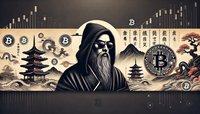

In [20]:
jpeg_image = Image.open(THUMBNAIL_FILE)
display(jpeg_image)